# WeatherPy
----



In [4]:
#! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from datetime import date
from datetime import datetime
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [5]:
citt=cities[:10]

In [7]:
print_log = open('../output/citieslog.txt', 'w',encoding='UTF-8')
print('Beginning Data Retrieval \n' + "-"*45)
count=1
set_=1
Unknown_num=0

# Set up lists to hold response info:
city_=[]  
lat_=[]          
lng_=[]         
cloudiness_=[]       
country_=[]         
date_=[]         
humidity_=[]                  
max_temp_=[]    
wind_speed_=[] 

for city in cities:

    try:
        response = requests.get(query_url + city).json()
        cityID = int(response['id'])
        cityName = response['name']
        city_.append(cityName)
        country_.append(response["sys"]["country"])
        date_.append(response["dt"])
        lat_.append(response["coord"]["lat"])
        lng_.append(response["coord"]["lon"])
        max_temp_.append(response["main"]["temp_max"])
        humidity_.append(response["main"]["humidity"])
        cloudiness_.append(response["clouds"]["all"])
        wind_speed_.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f'Processing Record {count} of Set {set_} | {city_record}')
        print_log.write(f"{cityName} with city ID:{cityID} was found \n")
    except:
        print("City not found. Skipping...")
        print_log.write(f" City{city} not found. Skipping... \n")
        Unknown_num+=1
    count+=1
    if count==51:
       
        count=1
        set_+=1
        time.sleep(60) 
        
print("-"*45 +'\n Data Retrieval Complete \n' +"-"*45)
if Unknown_num>0:
    print(f"API didn't give any information for {Unknown_num} cities")       

print_log.close()
        
        
        
        

Beginning Data Retrieval 
---------------------------------------------
Processing Record 1 of Set 1 | Urucará
Processing Record 2 of Set 1 | Muli
Processing Record 3 of Set 1 | Yellowknife
Processing Record 4 of Set 1 | Cabedelo
Processing Record 5 of Set 1 | Union
Processing Record 6 of Set 1 | Vaini
Processing Record 7 of Set 1 | Setermoen
Processing Record 8 of Set 1 | Khatanga
Processing Record 9 of Set 1 | Río Gallegos
City not found. Skipping...
Processing Record 11 of Set 1 | Saldanha
Processing Record 12 of Set 1 | Lishui
Processing Record 13 of Set 1 | Cherskiy
Processing Record 14 of Set 1 | Rikitea
Processing Record 15 of Set 1 | Kapaa
Processing Record 16 of Set 1 | Mar del Plata
Processing Record 17 of Set 1 | Albany
Processing Record 18 of Set 1 | Yar-Sale
Processing Record 19 of Set 1 | Bluff
Processing Record 20 of Set 1 | Yulara
Processing Record 21 of Set 1 | Tahoua
Processing Record 22 of Set 1 | Hermanus
Processing Record 23 of Set 1 | Kavaratti
City not found. Ski

Processing Record 5 of Set 5 | Faya
Processing Record 6 of Set 5 | Copiapó
Processing Record 7 of Set 5 | Isangel
Processing Record 8 of Set 5 | Vostok
Processing Record 9 of Set 5 | Gouyave
City not found. Skipping...
Processing Record 11 of Set 5 | Springbok
Processing Record 12 of Set 5 | Kot Radha Kishan
Processing Record 13 of Set 5 | Albeşti
Processing Record 14 of Set 5 | Puerto Gaitán
Processing Record 15 of Set 5 | Taoudenni
Processing Record 16 of Set 5 | Dothan
Processing Record 17 of Set 5 | Athens
Processing Record 18 of Set 5 | Mormugao
Processing Record 19 of Set 5 | Cabo San Lucas
Processing Record 20 of Set 5 | Deer Lake
Processing Record 21 of Set 5 | Juneau
City not found. Skipping...
Processing Record 23 of Set 5 | Bagar
Processing Record 24 of Set 5 | Severo-Kuril'sk
Processing Record 25 of Set 5 | Kinablangan
Processing Record 26 of Set 5 | Manaus
Processing Record 27 of Set 5 | São Filipe
Processing Record 28 of Set 5 | Berlevåg
Processing Record 29 of Set 5 | Ba

Processing Record 8 of Set 9 | Bac Lieu
Processing Record 9 of Set 9 | Lovington
Processing Record 10 of Set 9 | Sakon Nakhon
Processing Record 11 of Set 9 | Dingle
Processing Record 12 of Set 9 | Haines Junction
Processing Record 13 of Set 9 | Arman'
Processing Record 14 of Set 9 | Abaza
Processing Record 15 of Set 9 | São Luís de Montes Belos
Processing Record 16 of Set 9 | Fairbanks
Processing Record 17 of Set 9 | Muisne
Processing Record 18 of Set 9 | Caravelas
Processing Record 19 of Set 9 | Cassilândia
Processing Record 20 of Set 9 | Mulegé
Processing Record 21 of Set 9 | São Luiz Gonzaga
Processing Record 22 of Set 9 | Rumonge
Processing Record 23 of Set 9 | Øksfjord
Processing Record 24 of Set 9 | Fuyang
Processing Record 25 of Set 9 | Naantali
Processing Record 26 of Set 9 | Nishihara
Processing Record 27 of Set 9 | Zhangye
Processing Record 28 of Set 9 | Viedma
Processing Record 29 of Set 9 | Havelock
Processing Record 30 of Set 9 | Kayerkan
Processing Record 31 of Set 9 | Ba

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_,
    "Lat": lat_,
    "Lng": lng_,
    "Max Temp": max_temp_,
    "Humidity": humidity_,
    "Cloudiness": cloudiness_,
    "Wind Speed": wind_speed_,
    "Country": country_,
    "Date": date_,    
}

weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file,index=False)
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        547 non-null    object 
 1   Lat         547 non-null    float64
 2   Lng         547 non-null    float64
 3   Max Temp    547 non-null    float64
 4   Humidity    547 non-null    int64  
 5   Cloudiness  547 non-null    int64  
 6   Wind Speed  547 non-null    float64
 7   Country     547 non-null    object 
 8   Date        547 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 38.6+ KB


In [16]:
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Urucará,-2.5364,-57.7600,86.77,60,83,5.23,BR,1643732699
1,Muli,2.9167,73.5667,83.55,74,39,14.45,MV,1643732700
2,Yellowknife,62.4560,-114.3525,-27.58,75,0,9.22,CA,1643732456
3,Cabedelo,-6.9811,-34.8339,88.47,64,13,12.82,BR,1643732700
4,Union,40.6334,-74.2663,36.27,57,0,5.75,US,1643732436


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,19.244294,20.182271,51.035210,70.663620,57.321755,8.226325,1.643733e+09
std,33.998690,90.467743,33.809192,22.558354,40.113013,6.124634,3.209092e+02
min,-54.800000,-175.200000,-41.850000,6.000000,0.000000,0.000000,1.643732e+09
25%,-8.610200,-61.271050,25.935000,58.500000,15.000000,3.580000,1.643733e+09
50%,21.315600,25.570100,63.660000,75.000000,73.000000,6.910000,1.643733e+09
75%,48.275450,101.525000,78.160000,88.000000,99.000000,11.375000,1.643733e+09
max,78.218600,178.416700,106.360000,100.000000,100.000000,49.480000,1.643734e+09


In [18]:
#  Get the indices of cities that have humidity over 100%.
weather_data.loc[weather_data['Humidity']>100,:]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#clean_city_data=weather_data.drop(weather_data[weather_data['Humidity'] > 100].index)
#clean_city_data.head()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [40]:
def plotting(y_col,df=weather_data,x_col='Lat',time=date.fromtimestamp(date_[0]),font=15,pad=20,font_w="bold"):
    plt.figure(figsize=(15,7))
    plt.scatter(df[x_col],df[y_col], facecolors="#6D9886", edgecolors="black" ,s=55)
    plt.xlabel('Latitude')
    plt.grid()
    if y_col=='Max Temp':
        plt.ylabel('Max Temperature(F)')
        plt.title(f'City Latitude vs Max Temperature ({time})',fontsize= font,pad=pad,\
                  fontweight=font_w)
        plt.savefig('../Images/Lat_Tem.png')
    elif y_col=='Humidity':
        plt.ylabel('Humidity(%)')
        plt.title(f'City Latitude vs Humidity ({time})',fontsize= font,pad=pad,fontweight=font_w)
        plt.savefig('../images/Lat_humidity.png') 
    elif y_col=='Cloudiness':
        plt.ylabel('Cloudiness(%)')
        plt.title(f'City Latitude vs Cloudiness ({time})',fontsize= font,pad=pad,fontweight=font_w)
        plt.savefig('../Images/Lat_cloud.png') 
    elif y_col=='Wind Speed':
        plt.ylabel('Wind Speed(mph)')
        plt.title(f'City Latitude vs Wind Speed ({time})',fontsize= font,pad=pad,fontweight=font_w)
        plt.savefig('../Images/Lat_wind.png')
    plt.show()
        
        

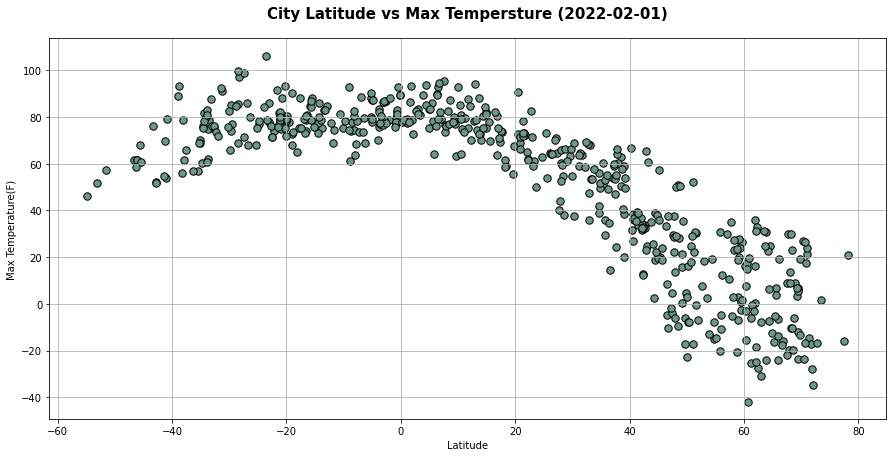

In [41]:
plotting(y_col='Max Temp')

##### This plot shows Maximum temperature for different city latitude depends on the distance of city from the equator toward North and South. There is a good Correlation between temperature and latitude on both hemisphers seperatly.

## Latitude vs. Humidity Plot

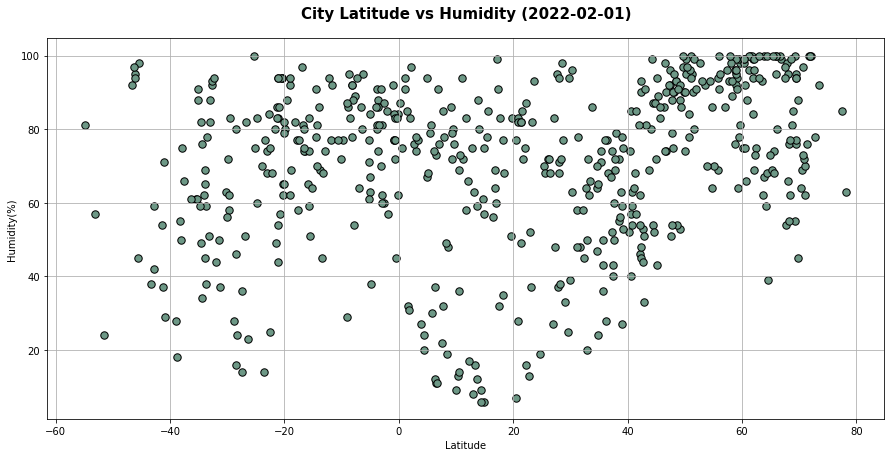

In [22]:
plotting(y_col='Humidity')

##### This graph indicates there is not significant correlation between humidity and latitude 

## Latitude vs. Cloudiness Plot

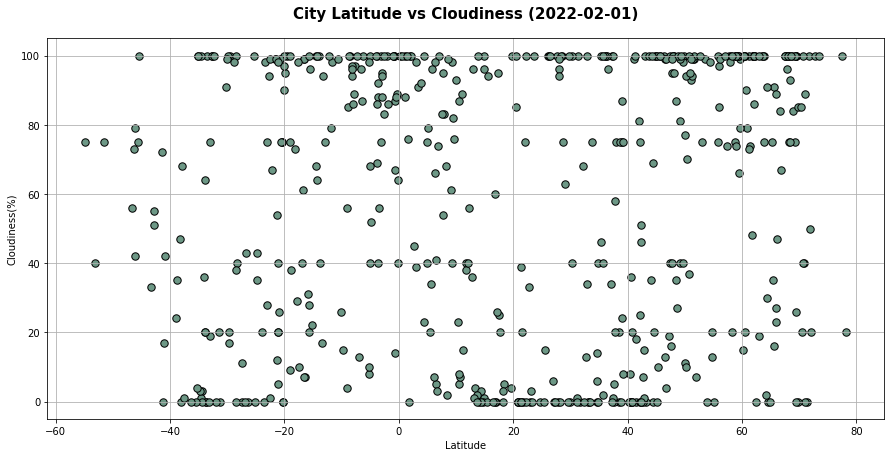

In [23]:
plotting(y_col='Cloudiness')

##### This graph shows there is not any correlation between Cloudiness and latitude 

## Latitude vs. Wind Speed Plot

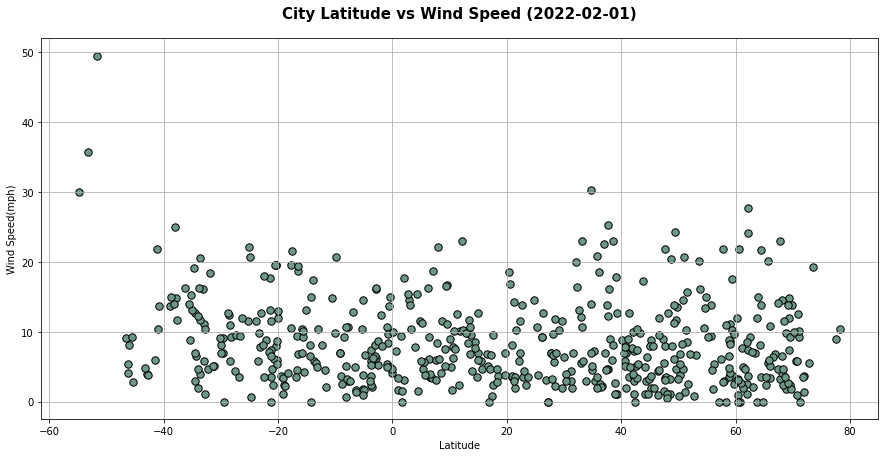

In [24]:
plotting(y_col='Wind Speed')

##### No significant correlation between windness and cities latitude was observed.

## Linear Regression

In [25]:
# Create new data frame for northern hemisphere (lat >= 0 degree):
north_hem = weather_data[weather_data['Lat'] >= 0]
# Create new data frame for Southern hemisphere (lat < 0 degree):
south_hem = weather_data[weather_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Max Temp and Latitude is -0.885
The r-squared is: 0.7833617041797757




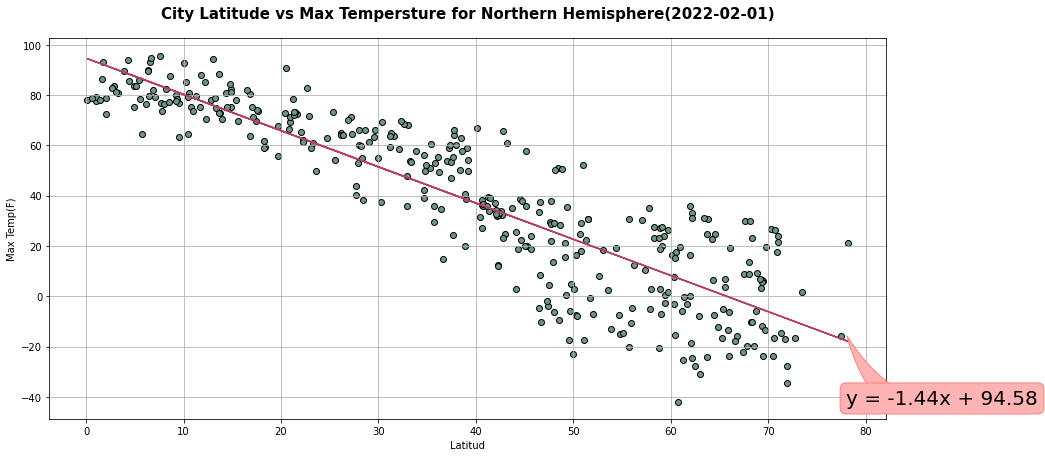

In [26]:
# Calculate the correlation coefficient and linear regression model 
x_val=north_hem['Lat']
y_val=north_hem['Max Temp']
Correlation=st.pearsonr(x_val,y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val,y_val)
reress_values=x_val* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The correlation between Max Temp and Latitude is {round(Correlation[0],3)}")
print(f"The r-squared is: {rvalue**2}\n")
print("")
plt.figure(figsize=(15,7))
plt.scatter(x_val,y_val, facecolors="#6D9886", edgecolors="black" )
plt.plot(x_val,reress_values,"#B8405E")
plt.xlabel('Latitud')
plt.ylabel('Max Temp(F)')
plt.title(f'City Latitude vs Max Temperture for Northern Hemisphere({date.fromtimestamp(date_[0])})',fontsize= 15,pad=20,fontweight="bold")
plt.annotate(line_eq, xy=(78, -15), xycoords='data',xytext=(0, -70), textcoords='offset points',size=20,
            bbox=dict(boxstyle="round",
                      fc=(1.0, 0.7, 0.7),
                      ec=(1., .5, .5)),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            fc=(1.0, 0.7, 0.7), ec=(1., .5, .5),
                            patchA=None,
                            patchB=None,
                            relpos=(0.2, 0.8),
                            connectionstyle="arc3,rad=-0.1"))
plt.grid()
plt.savefig('../Images/north_temp.png')                            
plt.show()

##### There is a strong relationship (-0.885) between latitude and temperature in northern hemisphere, by increasing the latitude the temperature would decreased. The r_square 0.783 confirms this regression model is strong enough.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Max Temp and Latitude is 0.455
The r-squared is: 0.20667106008178313



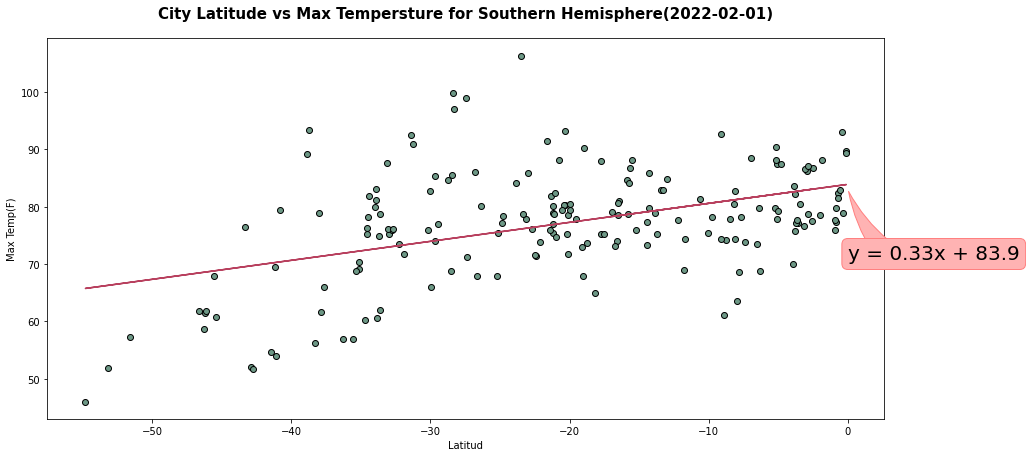

In [27]:
x_val=south_hem['Lat']
y_val=south_hem['Max Temp']
Correlation=st.pearsonr(x_val,y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val,y_val)
reress_values=x_val* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The correlation between Max Temp and Latitude is {round(Correlation[0],3)}")
print(f"The r-squared is: {rvalue**2}\n")

plt.figure(figsize=(15,7))
plt.scatter(x_val,y_val, facecolors="#6D9886", edgecolors="black" )
plt.plot(x_val,reress_values,"#B8405E")
plt.xlabel('Latitud')
plt.ylabel('Max Temp(F)')
plt.title(f'City Latitude vs Max Tempersture for Southern Hemisphere({date.fromtimestamp(date_[0])})',fontsize= 15,pad=20,fontweight="bold")
plt.annotate(line_eq, xy=(0, 83), xycoords='data',xytext=(0, -70), textcoords='offset points',size=20,
            bbox=dict(boxstyle="round",
                      fc=(1.0, 0.7, 0.7),
                      ec=(1., .5, .5)),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            fc=(1.0, 0.7, 0.7), ec=(1., .5, .5),
                            patchA=None,
                            patchB=None,
                            relpos=(0.2, 0.8),
                            connectionstyle="arc3,rad=-0.1"))
plt.savefig('../Images/south_temp.png')                            
plt.show()

###### In compare with Northern Hemisphere the correlation between latitude and max temperature is weaker in southern Hemisphere. The value of r_square 0.27 is not enough high to consider this linear regression model. However we can still conclude by moving towards the south pole the temperature decrease.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Here the correlation between Humidity and Latitude is 0.441
The r-squared is: 0.19482704072569726




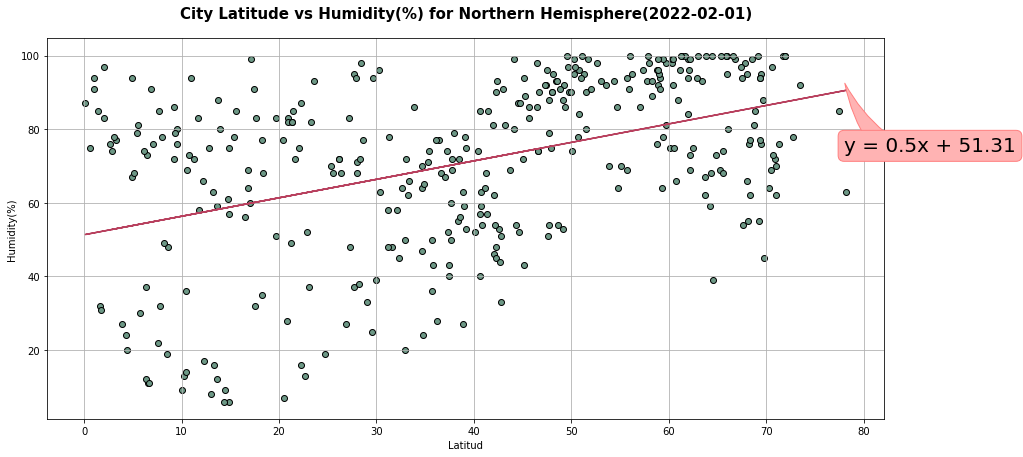

In [28]:
x_val=north_hem['Lat']
y_val=north_hem['Humidity']
Correlation=st.pearsonr(x_val,y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val,y_val)
reress_values=x_val* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Here the correlation between Humidity and Latitude is {round(Correlation[0],3)}")
print(f"The r-squared is: {rvalue**2}\n")
print("")
plt.figure(figsize=(15,7))
plt.scatter(x_val,y_val, facecolors="#6D9886", edgecolors="black" )
plt.plot(x_val,reress_values,"#B8405E")
plt.xlabel('Latitud')
plt.ylabel('Humidity(%)')
plt.title(f'City Latitude vs Humidity(%) for Northern Hemisphere({date.fromtimestamp(date_[0])})',fontsize= 15,pad=20,fontweight="bold")
plt.annotate(line_eq, xy=(78, 93), xycoords='data',xytext=(0, -70), textcoords='offset points',size=20,
            bbox=dict(boxstyle="round",
                      fc=(1.0, 0.7, 0.7),
                      ec=(1., .5, .5)),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            fc=(1.0, 0.7, 0.7), ec=(1., .5, .5),
                            patchA=None,
                            patchB=None,
                            relpos=(0.2, 0.8),
                            connectionstyle="arc3,rad=-0.1"))
plt.grid()
plt.savefig('../Images/north_humidity.png')                            
plt.show()

#### Eventough there is not a strong relationship between latitude and humidity, we can observe the humidity of all cities with latitude more than 45 is greater than %35.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Here the correlation between Humidity and Latitude is 0.301
The r-squared is: 0.0905857551031097




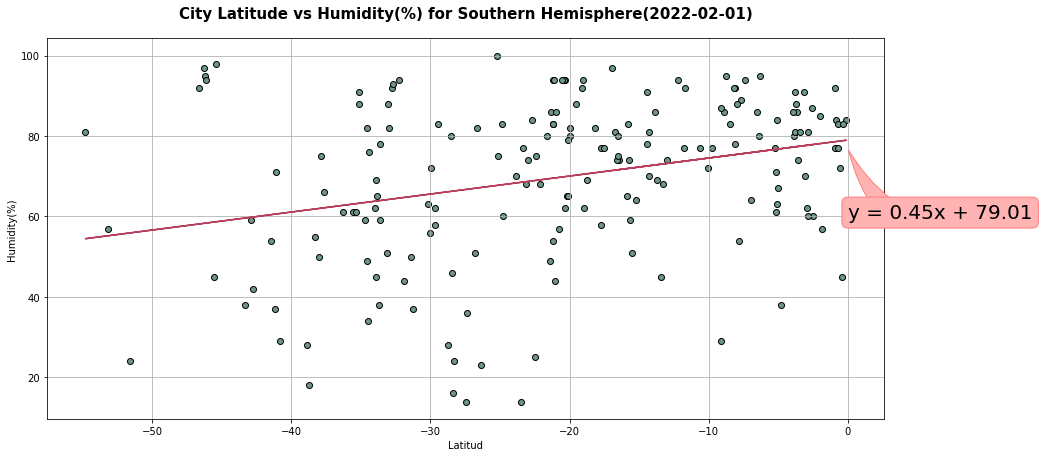

In [39]:
x_val=south_hem['Lat']
y_val=south_hem['Humidity']
Correlation=st.pearsonr(x_val,y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val,y_val)
reress_values=x_val* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Here the correlation between Humidity and Latitude is {round(Correlation[0],3)}")
print(f"The r-squared is: {rvalue**2}\n")
print("")
plt.figure(figsize=(15,7))
plt.scatter(x_val,y_val, facecolors="#6D9886", edgecolors="black" )
plt.plot(x_val,reress_values,"#B8405E")
plt.xlabel('Latitud')
plt.ylabel('Humidity(%)')
plt.title(f'City Latitude vs Humidity(%) for Southern Hemisphere({date.fromtimestamp(date_[0])})',fontsize= 15,pad=20,fontweight="bold")
plt.annotate(line_eq, xy=(0, 77), xycoords='data',xytext=(0, -70), textcoords='offset points',size=20,
            bbox=dict(boxstyle="round",
                      fc=(1.0, 0.7, 0.7),
                      ec=(1., .5, .5)),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            fc=(1.0, 0.7, 0.7), ec=(1., .5, .5),
                            patchA=None,
                            patchB=None,
                            relpos=(0.2, 0.8),
                            connectionstyle="arc3,rad=-0.1"))
plt.grid()
plt.savefig('../images/south_humidity.png')                            
plt.show()

##### There is not a strong relationship between latitude and humidity in southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Here the correlation between Cloudiness and Latitude is 0.21
The r-squared is: 0.0442546149260567




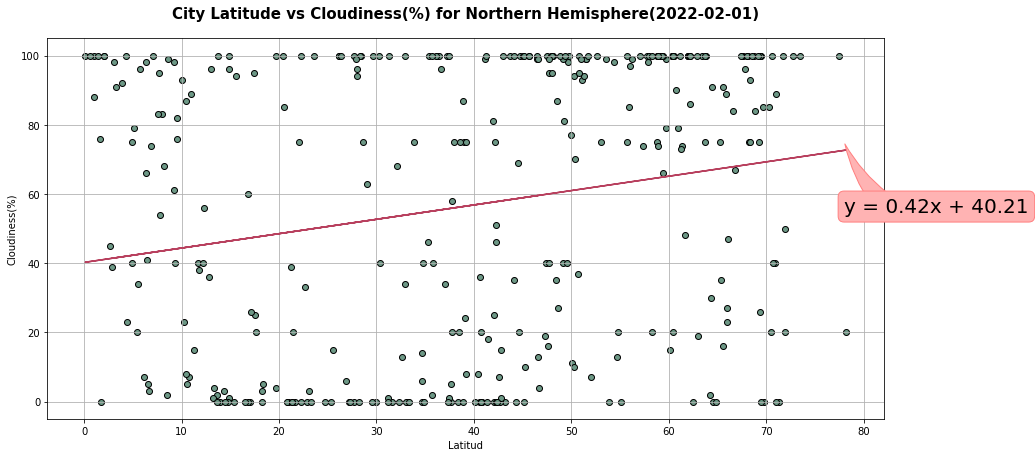

In [38]:
x_val=north_hem['Lat']
y_val=north_hem['Cloudiness']
Correlation=st.pearsonr(x_val,y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val,y_val)
reress_values=x_val* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Here the correlation between Cloudiness and Latitude is {round(Correlation[0],3)}")
print(f"The r-squared is: {rvalue**2}\n")
print("")
plt.figure(figsize=(15,7))
plt.scatter(x_val,y_val, facecolors="#6D9886", edgecolors="black" )
plt.plot(x_val,reress_values,"#B8405E")
plt.xlabel('Latitud')
plt.ylabel('Cloudiness(%)')
plt.title(f'City Latitude vs Cloudiness(%) for Northern Hemisphere({date.fromtimestamp(date_[0])})',fontsize= 15,pad=20,fontweight="bold")
plt.annotate(line_eq, xy=(78, 75), xycoords='data',xytext=(0, -70), textcoords='offset points',size=20,
            bbox=dict(boxstyle="round",
                      fc=(1.0, 0.7, 0.7),
                      ec=(1., .5, .5)),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            fc=(1.0, 0.7, 0.7), ec=(1., .5, .5),
                            patchA=None,
                            patchB=None,
                            relpos=(0.2, 0.8),
                            connectionstyle="arc3,rad=-0.1"))
plt.grid()
plt.savefig('../Images/north_cloudiness.png')                            
plt.show()

##### There is not a strong relationship between latitude and cloudiness in Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Here the correlation between Cloudiness and Latitude is 0.32
The r-squared is: 0.10229087911044915




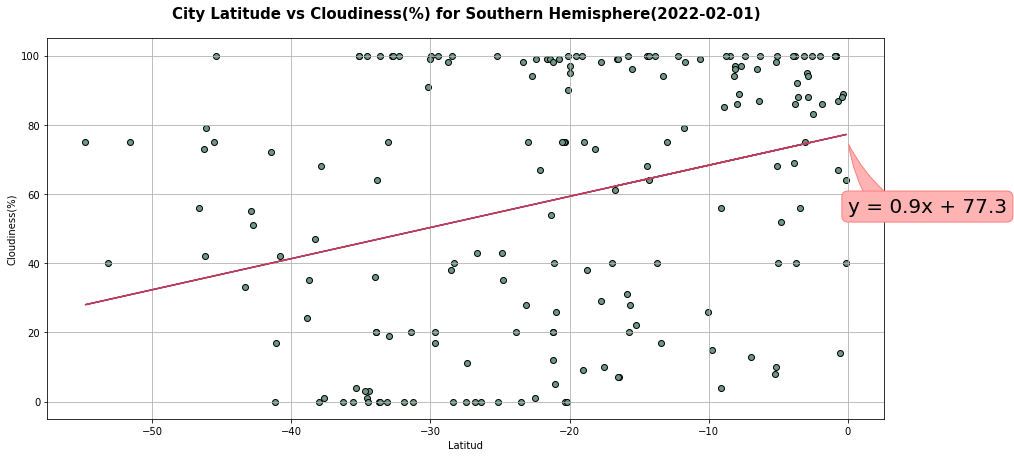

In [36]:
x_val=south_hem['Lat']
y_val=south_hem['Cloudiness']
Correlation=st.pearsonr(x_val,y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val,y_val)
reress_values=x_val* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Here the correlation between Cloudiness and Latitude is {round(Correlation[0],3)}")
print(f"The r-squared is: {rvalue**2}\n")
print("")
plt.figure(figsize=(15,7))
plt.scatter(x_val,y_val, facecolors="#6D9886", edgecolors="black" )
plt.plot(x_val,reress_values,"#B8405E")
plt.xlabel('Latitud')
plt.ylabel('Cloudiness(%)')
plt.title(f'City Latitude vs Cloudiness(%) for Southern Hemisphere({date.fromtimestamp(date_[0])})',fontsize= 15,pad=20,fontweight="bold")
plt.annotate(line_eq, xy=(0, 75), xycoords='data',xytext=(0, -70), textcoords='offset points',size=20,
            bbox=dict(boxstyle="round",
                      fc=(1.0, 0.7, 0.7),
                      ec=(1., .5, .5)),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            fc=(1.0, 0.7, 0.7), ec=(1., .5, .5),
                            patchA=None,
                            patchB=None,
                            relpos=(0.2, 0.8),
                            connectionstyle="arc3,rad=-0.1"))
plt.grid()
plt.savefig('../Images/south_cloudiness.png')                            
plt.show()

##### There is not a strong relationship between latitude and cloudiness in southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Here the correlation between Wind Speed and Latitude is -0.015
The r-squared is: 0.00021409369819181813




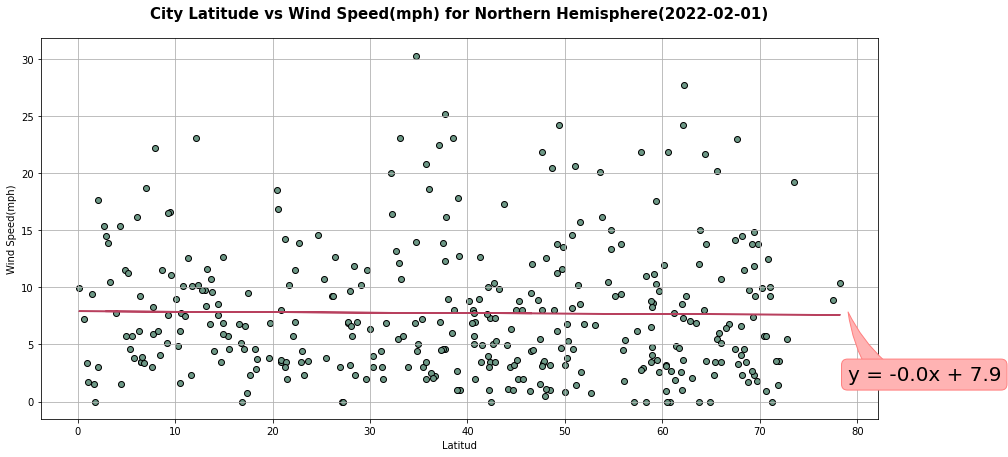

In [34]:
x_val=north_hem['Lat']
y_val=north_hem['Wind Speed']
Correlation=st.pearsonr(x_val,y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val,y_val)
reress_values=x_val* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Here the correlation between Wind Speed and Latitude is {round(Correlation[0],3)}")
print(f"The r-squared is: {rvalue**2}\n")
print("")
plt.figure(figsize=(15,7))
plt.scatter(x_val,y_val, facecolors="#6D9886", edgecolors="black" )
plt.plot(x_val,reress_values,"#B8405E")
plt.xlabel('Latitud')
plt.ylabel('Wind Speed(mph)')
plt.title(f'City Latitude vs Wind Speed(mph) for Northern Hemisphere({date.fromtimestamp(date_[0])})',fontsize= 15,pad=20,fontweight="bold")
plt.annotate(line_eq, xy=(79, 8), xycoords='data',xytext=(0, -70), textcoords='offset points',size=20,
            bbox=dict(boxstyle="round",
                      fc=(1.0, 0.7, 0.7),
                      ec=(1., .5, .5)),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            fc=(1.0, 0.7, 0.7), ec=(1., .5, .5),
                            patchA=None,
                            patchB=None,
                            relpos=(0.2, 0.8),
                            connectionstyle="arc3,rad=-0.1"))
plt.grid()
plt.savefig('../Images/north_wind.png')                            
plt.show()

##### There is  no significant correlation between latitude and wind speed in the Northern Hemisphere. The r_squared is very weak that shows the regression model is not useful .

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Here the correlation between Wind Speed and Latitude is -0.325
The r-squared is: 0.10574576004764237




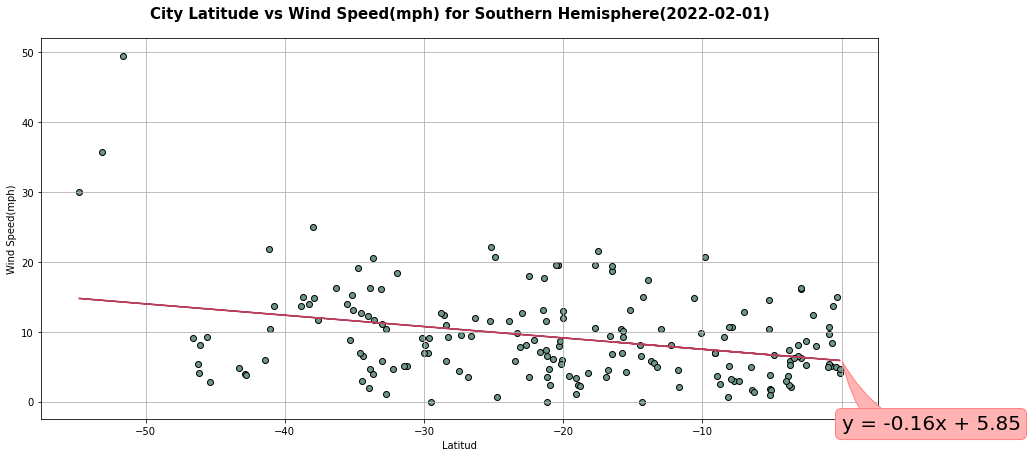

In [33]:
x_val=south_hem['Lat']
y_val=south_hem['Wind Speed']
Correlation=st.pearsonr(x_val,y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val,y_val)
reress_values=x_val* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Here the correlation between Wind Speed and Latitude is {round(Correlation[0],3)}")
print(f"The r-squared is: {rvalue**2}\n")
print("")
plt.figure(figsize=(15,7))
plt.scatter(x_val,y_val, facecolors="#6D9886", edgecolors="black" )
plt.plot(x_val,reress_values,"#B8405E")
plt.xlabel('Latitud')
plt.ylabel('Wind Speed(mph)')
plt.title(f'City Latitude vs Wind Speed(mph) for Southern Hemisphere({date.fromtimestamp(date_[0])})',fontsize= 15,pad=20,fontweight="bold")
plt.annotate(line_eq, xy=(0, 6), xycoords='data',xytext=(0, -70), textcoords='offset points',size=20,
            bbox=dict(boxstyle="round",
                      fc=(1.0, 0.7, 0.7),
                      ec=(1., .5, .5)),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            fc=(1.0, 0.7, 0.7), ec=(1., .5, .5),
                            patchA=None,
                            patchB=None,
                            relpos=(0.2, 0.8),
                            connectionstyle="arc3,rad=-0.1"))
plt.grid()
plt.savefig('../Images/south_wind.png')                            
plt.show()

##### In the Southern Hemisphere we see a much stronger correlation between latitude and wind speed with an r-squared value of 0.105. But this is still weak!